# 1-Data preprocessing after spliting dataset

In [2]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import joblib
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor


In [3]:
df = pd.read_csv("./data/properties.csv")

In [4]:
df.head()

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75511 non-null  int64  
 1   price                           75511 non-null  int64  
 2   property_type                   75511 non-null  object 
 3   subproperty_type                75511 non-null  object 
 4   region                          75511 non-null  object 
 5   province                        75511 non-null  object 
 6   locality                        75511 non-null  object 
 7   zip_code                        75511 non-null  int64  
 8   latitude                        61413 non-null  float64
 9   longitude                       61413 non-null  float64
 10  construction_year               42120 non-null  float64
 11  total_area_sqm                  67896 non-null  float64
 12  surface_land_sqm                

In [6]:
# Counting null values for each variable
null_counts = df.isna().sum()
null_percentages = null_counts/ len(df) * 100
print (null_percentages)

id                                 0.000000
price                              0.000000
property_type                      0.000000
subproperty_type                   0.000000
region                             0.000000
province                           0.000000
locality                           0.000000
zip_code                           0.000000
latitude                          18.670128
longitude                         18.670128
construction_year                 44.220047
total_area_sqm                    10.084623
surface_land_sqm                  48.014197
nbr_frontages                     34.890281
nbr_bedrooms                       0.000000
equipped_kitchen                   0.000000
fl_furnished                       0.000000
fl_open_fire                       0.000000
fl_terrace                         0.000000
terrace_sqm                       17.401438
fl_garden                          0.000000
garden_sqm                         3.892148
fl_swimming_pool                

In [7]:
df.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

In [8]:
# Creating lists for numerical variables, dummy variables (1/0), and categorical variables
cat_features = ['property_type', 'subproperty_type', 'region', 'province', 'locality', 'zip_code', 'state_building', 
            'epc', 'heating_type', 'equipped_kitchen']
num_features = ["cadastral_income","surface_land_sqm", "total_area_sqm", "latitude", "longitude", "garden_sqm", 
            "primary_energy_consumption_sqm", "construction_year", "nbr_frontages", "nbr_bedrooms", "terrace_sqm" ]
dummy_features = ["fl_garden", "fl_furnished", "fl_open_fire", "fl_terrace","fl_swimming_pool", "fl_floodzone", "fl_double_glazing"]


## Spliting data into train and test 

In [9]:
X = df[num_features + dummy_features + cat_features]
y = df["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (60408, 28)
Shape of X_test: (15103, 28)
Shape of y_train: (60408,)
Shape of y_test: (15103,)


In [10]:
# Impute missing values using SimpleImputer on numerical features
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train[num_features])
X_train[num_features] = imputer.transform(X_train[num_features])
X_test[num_features] = imputer.transform(X_test[num_features])

In [11]:
# Initialize OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Fit OneHotEncoder to training data
enc.fit(X_train[cat_features])

# Transform categorical features in training and testing data
X_train_cat = enc.transform(X_train[cat_features]).toarray()
X_test_cat = enc.transform(X_test[cat_features]).toarray()

# Concatenate numerical features, encoded categorical features, and dummy_features for training and testing data
X_train_processed = np.concatenate([X_train[num_features], X_train_cat, X_train[dummy_features]], axis=1)
X_test_processed = np.concatenate([X_test[num_features], X_test_cat, X_test[dummy_features]], axis=1)

In [12]:
# Save the fitted imputer and encoder
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(enc, 'encoder.pkl')

['encoder.pkl']

In [13]:
numerical_correlation = pd.DataFrame(X_train_processed[:, :len(num_features)], columns=num_features).corrwith(y_train)
print("Correlation Coefficients for Numerical Features:")
print(numerical_correlation)

Correlation Coefficients for Numerical Features:
cadastral_income                 -0.000384
surface_land_sqm                  0.003939
total_area_sqm                    0.003793
latitude                          0.000367
longitude                        -0.006489
garden_sqm                        0.003740
primary_energy_consumption_sqm   -0.004367
construction_year                 0.003500
nbr_frontages                     0.000347
nbr_bedrooms                      0.003055
terrace_sqm                      -0.001020
dtype: float64


In [14]:
# Calculate correlation coefficients for encoded categorical features
encoded_cat_correlation = pd.DataFrame(X_train_cat, columns=enc.get_feature_names_out(cat_features)).corrwith(y_train)

#Calculate correlation coefficients for dummy features (boolean features)
dummy_features_correlation = pd.DataFrame(X_train[dummy_features], columns=dummy_features).corrwith(y_train)
print("\nCorrelation Coefficients for Encoded Categorical Features:")
print(encoded_cat_correlation)

print("\nCorrelation Coefficients for F1 Features:")
print(dummy_features_correlation)


c:\Users\Nasrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Nasrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Correlation Coefficients for Encoded Categorical Features:
property_type_APARTMENT                0.003326
property_type_HOUSE                   -0.003326
subproperty_type_APARTMENT             0.003250
subproperty_type_APARTMENT_BLOCK       0.009126
subproperty_type_BUNGALOW              0.000273
                                         ...   
equipped_kitchen_SEMI_EQUIPPED        -0.014294
equipped_kitchen_USA_HYPER_EQUIPPED    0.005812
equipped_kitchen_USA_INSTALLED         0.000146
equipped_kitchen_USA_SEMI_EQUIPPED     0.002023
equipped_kitchen_USA_UNINSTALLED       0.001976
Length: 1173, dtype: float64

Correlation Coefficients for F1 Features:
fl_garden            0.031017
fl_furnished         0.025310
fl_open_fire        -0.013707
fl_terrace           0.032123
fl_swimming_pool     0.195643
fl_floodzone        -0.065832
fl_double_glazing    0.003232
dtype: float64


In [15]:
# Train the model on the training data
regressor = LinearRegression()
regressor.fit(X_train_processed, y_train)

# Make predictions
y_train_pred = regressor.predict(X_train_processed)
y_test_pred = regressor.predict(X_test_processed)

# Calculate the scores
train_score = regressor.score(X_train_processed, y_train)
test_score = regressor.score(X_test_processed, y_test)
print(f"Train score is: {train_score}")
print(f"Test score is: {test_score}")

Train score is: 0.44977841180176803
Test score is: 0.496384099346191


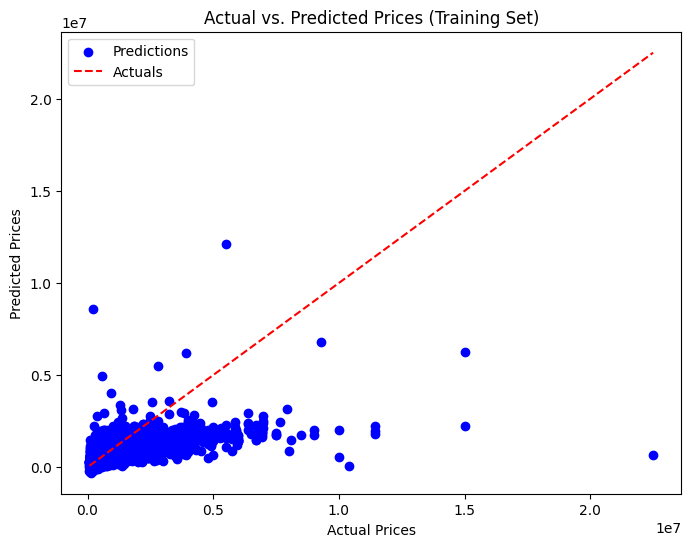

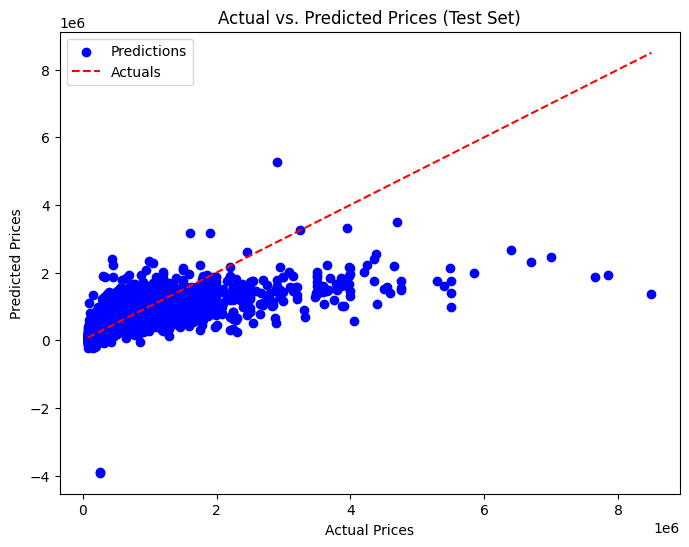

In [16]:
# Visualize the actual vs. predicted prices for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Predictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Actuals')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.legend()
plt.show()

# Visualize the actual vs. predicted prices for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actuals')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Test Set)')
plt.legend()
plt.show()

In [17]:
# Save the trained model
joblib.dump(regressor, 'trained_model_2.pkl')

['trained_model_2.pkl']

## XGboost

In [18]:
# Apply one-hot encoding to categorical variables
X_encoded = pd.get_dummies(X, columns=[
    'property_type', 'subproperty_type', 'region', 'province', 'locality', 
    'state_building', 'epc', 'heating_type', 'equipped_kitchen'
])

# Split the data into training and test sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)


In [19]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')
xgb_regressor.fit(X_train_encoded, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
# Predict on the test data
y_pred = xgb_regressor.predict(X_train_encoded)

# Calculate R-squared for apartment and house models
r2 = r2_score(y_train, y_pred)

# Print the R-squared scores
print("R-squared:", r2)


R-squared: 0.9296432788441025


In [21]:
# Predict on the test data
y_pred = xgb_regressor.predict(X_test_encoded)

# Calculate R-squared for properties models
r2 = r2_score(y_test, y_pred)

# Print the R-squared scores
print("R-squared:", r2)

R-squared: 0.8022168775250441


In [22]:
# Perform cross-validation
# cv is the number of folds; 5 is a common choice
scores = cross_val_score(xgb_regressor, X_train_encoded, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert scores to positive; cross_val_score returns negative values for error metrics to facilitate maximization
mse_scores = -scores

print("Mean squared error for each fold:", mse_scores)
print("Average cross-validated MSE:", mse_scores.mean())

Mean squared error for each fold: [5.64600509e+10 3.91972121e+10 4.58486502e+10 8.47093483e+10
 4.39348657e+10 3.73963963e+10 5.77760247e+10 4.28669645e+10
 1.30956690e+11 5.64037503e+10]
Average cross-validated MSE: 59554995327.92627


In [23]:
# Save the trained model
joblib.dump(regressor, 'trained_model_3.pkl')

['trained_model_3.pkl']

## predictions 

In [27]:
# Load new data
new_data = pd.read_csv("data/new_data.csv") 

# Load the trained model and pre-fitted transformers
model = joblib.load('trained_model_3.pkl')
imputer = joblib.load('imputer.pkl')
encoder = joblib.load('encoder.pkl')

# Impute missing values for numerical features
new_data[num_features] = imputer.transform(new_data[num_features])

# Encode categorical features
encoded_features = encoder.transform(new_data[cat_features]).toarray()

# Combine numerical, dummy, and encoded categorical features for the prediction
X = np.concatenate([new_data[num_features], new_data[dummy_features], encoded_features], axis=1)

# Make predictions
predictions = model.predict(X)

# save the predictions
print(predictions)  

[ 305597.18518992  204746.89359022  910028.15466421 ... 1124942.29549035
  947387.77604546  102580.95360207]
